https://www.kaggle.com/kmader/image-similarity-with-siamese-networks

In [1]:
import scipy.misc

In [2]:
import numpy as np
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


In [3]:
import os
os.listdir('data_intensity/')

['9', '3', '10', '2', '6', '1', '4', '7', '8', '5']

In [3]:
count_list = []
import os
path = 'data_intensity/'
files = os.listdir(path)
count = 0
for file in os.listdir(path):
    count = 0
    for fl in os.listdir(path+'/'+file):
#         print(fl)
        count += 1
#     print(count)
    count_list.append(count)
print(count_list)
print("total: ", sum(count_list))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
total:  30


In [4]:
all_dir = []
import os
path = 'data_intensity'
files = os.listdir(path)
count = 0
for file in os.listdir(path):
    temp_dir = []
    count = 0
    for fl in os.listdir(path+'/'+file):
#         print(path+'/'+file+'/'+fl)
        temp_dir.append(path+'/'+file+'/'+fl)
    all_dir.append(temp_dir)
print(all_dir[1])

['data_intensity/3/i002ra-mn.jpg', 'data_intensity/3/i002sa-mn.jpg', 'data_intensity/3/i002qa-mn.jpg']


In [15]:
# def gen_random_batch(in_groups, batch_halfsize = 8):
# out_img_a, out_img_b, out_score = [], [], []
# all_groups = list(range(len(count_list)))
# for match_group in [True, False]:
#     group_idx = np.random.choice(all_groups, size = batch_halfsize)
#     out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
#     if match_group:
#         b_group_idx = group_idx
#         out_score += [1]*batch_halfsize
#     else:
#         # anything but the same group
#         non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
#         b_group_idx = non_group_idx
#         out_score += [0]*batch_halfsize

#     out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
            
#     return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)


In [7]:
out_a, out_b, out_score = [], [], []
all_groups = list(range(len(count_list)))
batch_half = 4
for match in [True,False]:
#     print(i," case")
    gp_idx = np.random.choice(all_groups, size=batch_half)
    print(gp_idx)
#     out_a += [all_dir[c_idx][np.random.choice(range(count_list[c_idx]))]]
#     for c_idx in gp_idx:
# #         print(count_list[c_idx])
#         temp = all_dir[c_idx][np.random.choice(range(count_list[c_idx]))]
#         print(temp)
    
    out_a += [all_dir[c_idx][np.random.choice(range(count_list[c_idx]))] for c_idx in gp_idx]
    
    if match:
        b_gp_idx = gp_idx
        out_score += [1]*batch_half
    else:
        non_gp = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in gp_idx]
        b_gp_idx = non_gp
        out_score += [0]*batch_half
    print(b_gp_idx)
    out_b += [all_dir[c_idx][np.random.choice(range(count_list[c_idx]))] for c_idx in b_gp_idx]
    
print(out_a)
print(out_b)
print(out_score)

[2 7 1 6]
[2 7 1 6]
[2 4 9 1]
[9, 3, 4, 3]
['data_intensity/10/i010sa-mn.jpg', 'data_intensity/7/i007ra-fn.jpg', 'data_intensity/3/i002qa-mn.jpg', 'data_intensity/4/i003sa-fn.jpg', 'data_intensity/10/i010ra-mn.jpg', 'data_intensity/6/i006ra-mn.jpg', 'data_intensity/5/i004ra-mn.jpg', 'data_intensity/3/i002ra-mn.jpg']
['data_intensity/10/i010qa-mn.jpg', 'data_intensity/7/i007qa-fn.jpg', 'data_intensity/3/i002qa-mn.jpg', 'data_intensity/4/i003sa-fn.jpg', 'data_intensity/5/i004sa-mn.jpg', 'data_intensity/2/i001sa-mn.jpg', 'data_intensity/6/i006sa-mn.jpg', 'data_intensity/2/i001sa-mn.jpg']
[1, 1, 1, 1, 0, 0, 0, 0]


In [5]:
def gen_random_batch(count_list, all_dir, batch_half = 8):
    out_a, out_b, out_score = [], [], []
    all_groups = list(range(len(count_list)))
#     batch_half = 4
    for match in [True,False]:
    #     print(i," case")
        gp_idx = np.random.choice(all_groups, size=batch_half)
#         print(gp_idx)
    #     out_a += [all_dir[c_idx][np.random.choice(range(count_list[c_idx]))]]
    #     for c_idx in gp_idx:
    # #         print(count_list[c_idx])
    #         temp = all_dir[c_idx][np.random.choice(range(count_list[c_idx]))]
    #         print(temp)

        out_a += [all_dir[c_idx][np.random.choice(range(count_list[c_idx]))] for c_idx in gp_idx]

        if match:
            b_gp_idx = gp_idx
            out_score += [1]*batch_half
        else:
            non_gp = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in gp_idx]
            b_gp_idx = non_gp
            out_score += [0]*batch_half
#         print(b_gp_idx)
        out_b += [all_dir[c_idx][np.random.choice(range(count_list[c_idx]))] for c_idx in b_gp_idx]
    
    out_img_a, out_img_b = [], []
    print(len(out_a))
    for f_dir in [out_a, out_b]:
        for file in f_dir:
#             temp = cv2.imread(file)
            temp = scipy.misc.imread(file)
            temp = scipy.misc.imresize(temp,(256,256,3))
            temp = temp.astype(np.float)/255.0
            if f_dir == out_a:
                out_img_a.append(temp)
            else:
                out_img_b.append(temp)
#     print(len(out_img_a), out_img_a[0].shape)
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)


In [6]:
a, b, l = gen_random_batch(count_list, all_dir, batch_half = 8)

16


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [7]:
a.shape, b.shape, l.shape

((16, 256, 256, 3), (16, 256, 256, 3), (16,))

In [16]:

# x_train = x_train.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
# x_test = x_test.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
# y_train = y_train.values.astype('int')
# y_test = y_test.values.astype('int')
# print('Training', x_train.shape, x_train.max())
# print('Testing', x_test.shape, x_test.max())



Training (42000, 28, 28, 1) 1.0
Testing (18000, 28, 28, 1) 1.0


In [17]:
# # reorganize by groups
# train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
# test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]
# print('train groups:', [x.shape[0] for x in train_groups])
# print('test groups:', [x.shape[0] for x in test_groups])

train groups: [4171, 4227, 4221, 4176, 4125, 4189, 4187, 4230, 4236, 4238]
test groups: [1829, 1773, 1779, 1824, 1875, 1811, 1813, 1770, 1764, 1762]


In [39]:
import glob

for dir_path, dir_name, dir_files in os.walk('data/train'):
    print("dir path: ", dir_path)
    print("dir name: ",dir_name)
    print("dir files: ", dir_files)
#     for file in dir_files:
#         if glob.glob('*.jpg'):
#             print("True")

dir path:  data/train
dir name:  ['madonna', 'elton_john', 'jerry_seinfeld', 'ben_afflek', 'mindy_kaling']
dir files:  []
dir path:  data/train/madonna
dir name:  []
dir files:  ['11.jpg', '17.jpg', '8.jpg', '6.jpg', '9.jpg', '4.jpg', '2.jpg', '7.jpg', '10.jpg', '0.jpg', '12.jpg', '16.jpg', '1.jpg', '14.jpg', '5.jpg', '3.jpg', '13.jpg', '18.jpg', '15.jpg']
dir path:  data/train/elton_john
dir name:  []
dir files:  ['11.jpg', '8.jpg', '6.jpg', '9.jpg', '4.jpg', '2.jpg', '7.jpg', '10.jpg', '0.jpg', '12.jpg', '16.jpg', '1.jpg', '14.jpg', '5.jpg', '3.jpg', '13.jpg', '15.jpg']
dir path:  data/train/jerry_seinfeld
dir name:  []
dir files:  ['11.jpg', '17.jpg', '20.jpg', '8.jpg', '6.jpg', '9.jpg', '4.jpg', '2.jpg', '7.jpg', '10.jpg', '0.jpg', '12.jpg', '16.jpg', '1.jpg', '14.jpg', '5.jpg', '3.jpg', '13.jpg', '18.jpg', '19.jpg', '15.jpg']
dir path:  data/train/ben_afflek
dir name:  []
dir files:  ['11.jpg', '8.jpg', '6.jpg', '9.jpg', '4.jpg', '2.jpg', '7.jpg', '10.jpg', '0.jpg', '12.jpg', '1.j

6


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


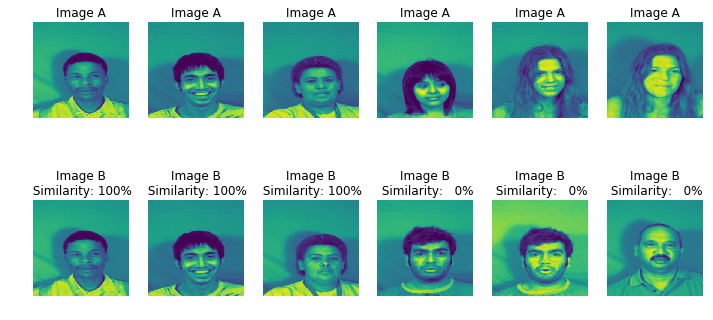

In [21]:
pv_a, pv_b, pv_sim = gen_random_batch(count_list, all_dir, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0])
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')

6


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


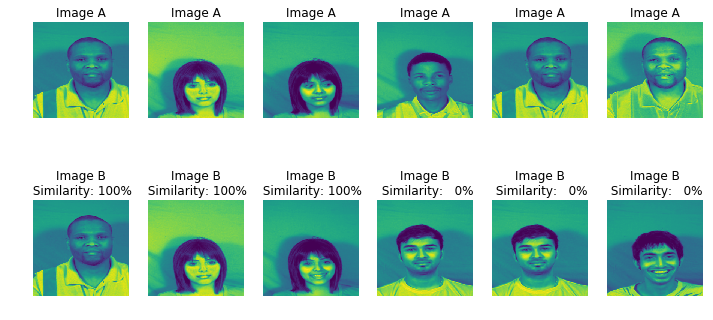

In [22]:
pv_a, pv_b, pv_sim = gen_random_batch(count_list, all_dir, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0])
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')

In [8]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout, GlobalMaxPooling2D
img_in = Input(shape = (256,256,3), name = 'FeatureNet_ImageInput')
n_layer = img_in

n_layer = Conv2D(8, kernel_size = (1,1), activation = 'linear')(n_layer)
n_layer = Conv2D(8, kernel_size = (5,5), activation = 'linear')(n_layer)
# n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
n_layer = MaxPool2D((2,2))(n_layer) #126X126

n_layer = Conv2D(16, kernel_size = (1,1), activation = 'linear')(n_layer)
n_layer = Conv2D(16, kernel_size = (3,3), activation = 'linear')(n_layer)
# n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
n_layer = MaxPool2D((2,2))(n_layer) # 62X62

n_layer = Conv2D(32, kernel_size = (1,1), activation = 'linear')(n_layer)
n_layer = Conv2D(32, kernel_size = (3,3), activation = 'linear')(n_layer)
# n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
n_layer = MaxPool2D((2,2))(n_layer) # 30X30X32

n_layer = Conv2D(64, kernel_size = (1,1), activation = 'linear')(n_layer)
n_layer = Conv2D(64, kernel_size = (3,3), activation = 'linear')(n_layer)
# n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
n_layer = MaxPool2D((2,2))(n_layer) # 14X14X64

n_layer = Conv2D(128, kernel_size = (1,1), activation = 'linear')(n_layer)
n_layer = Conv2D(128, kernel_size = (3,3), activation = 'linear')(n_layer)
# n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
n_layer = MaxPool2D((2,2))(n_layer) # 6X6X128

n_layer = GlobalMaxPooling2D('channels_last')(n_layer)
# n_layer = Conv2D(32, kernel_size = (1,1), activation = 'linear')(n_layer)
# n_layer = Conv2D(32, kernel_size = (3,3), activation = 'linear')(n_layer)
# # n_layer = BatchNormalization()(n_layer)
# n_layer = Activation('relu')(n_layer)
# n_layer = MaxPool2D((2,2))(n_layer) # 


# n_layer = Flatten()(n_layer)
# n_layer = Dense(32, activation = 'linear')(n_layer)
# n_layer = Dropout(0.5)(n_layer)
# n_layer = BatchNormalization()(n_layer)
# n_layer = Activation('relu')(n_layer)
feature_model = Model(inputs = [img_in], outputs = [n_layer], name = 'FeatureGenerationModel')
feature_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FeatureNet_ImageInput (Input (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 8)       32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 8)       1608      
_________________________________________________________________
activation_1 (Activation)    (None, 252, 252, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 16)      144       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 16)      2320      
__________

In [114]:
# from keras.models import Model
# from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout
# img_in = Input(shape = (64,64,3), name = 'FeatureNet_ImageInput')
# n_layer = img_in
# for i in range(2):
#     n_layer = Conv2D(8*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
#     n_layer = BatchNormalization()(n_layer)
#     n_layer = Activation('relu')(n_layer)
#     n_layer = Conv2D(16*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
#     n_layer = BatchNormalization()(n_layer)
#     n_layer = Activation('relu')(n_layer)
#     n_layer = MaxPool2D((2,2))(n_layer)
# n_layer = Flatten()(n_layer)
# n_layer = Dense(32, activation = 'linear')(n_layer)
# n_layer = Dropout(0.5)(n_layer)
# n_layer = BatchNormalization()(n_layer)
# n_layer = Activation('relu')(n_layer)
# feature_model = Model(inputs = [img_in], outputs = [n_layer], name = 'FeatureGenerationModel')
# feature_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FeatureNet_ImageInput (Input (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 60, 60, 16)        0         
__________

In [ ]:
from keras.layers import concatenate
img_a_in = Input(shape = (64,64,3), name = 'ImageA_Input')
img_b_in = Input(shape = (64,64,3), name = 'ImageB_Input')
img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)
combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(16, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(4, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(1, activation = 'sigmoid')(combined_features)
similarity_model = Model(inputs = [img_a_in, img_b_in], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.summary()

In [9]:
from keras.layers import concatenate
img_a_in = Input(shape = (256,256,3), name = 'ImageA_Input')
img_b_in = Input(shape = (256,256,3), name = 'ImageB_Input')
img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)
combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(32, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)

combined_features = Dense(8, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)

combined_features = Dense(4, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)

combined_features = Dense(1, activation = 'sigmoid')(combined_features)
similarity_model = Model(inputs = [img_a_in, img_b_in], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageA_Input (InputLayer)       (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
ImageB_Input (InputLayer)       (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
FeatureGenerationModel (Model)  (None, 128)          208840      ImageA_Input[0][0]               
                                                                 ImageB_Input[0][0]               
__________________________________________________________________________________________________
merge_features (Concatenate)    (None, 256)          0           FeatureGenerationModel[1][0]     
          

In [10]:
# setup the optimization process
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['mae'])



# without training (performing very poor)

6


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


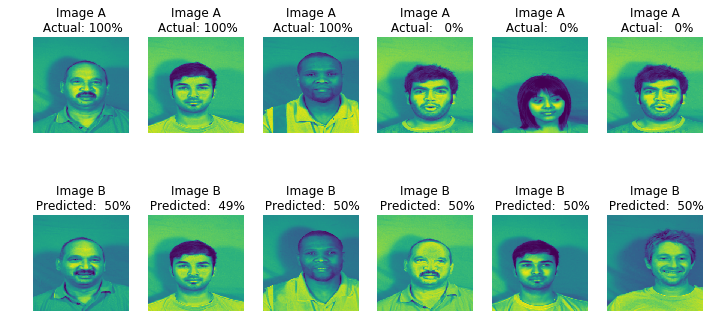

In [11]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(count_list, all_dir, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    return fig
# a completely untrained model
_ = show_model_output()


# start training

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [14]:
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('siamese_facenet_intensity.h5', verbose=1, save_best_only=True)


In [ ]:
# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=30,
#                     callbacks=[earlystopper, checkpointer])

In [15]:
# make a generator out of the data
def siam_gen(count_list, all_dir, batch_size = 16):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(count_list, all_dir, batch_size//2)
        yield [pv_a, pv_b], pv_sim
# we want a constant validation group to have a frame of reference for model performance
valid_a, valid_b, valid_sim = gen_random_batch(count_list, all_dir, 5)
loss_history = similarity_model.fit_generator(siam_gen(count_list, all_dir), 
                               steps_per_epoch = 30,#500,
                               validation_data=([valid_a, valid_b], valid_sim),
                                              epochs = 10,
                                             verbose = True,
                                             callbacks=[earlystopper,checkpointer])

10


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


16
Epoch 1/10
16
16
16
16
16
16
16
 1/30 [>.............................] - ETA: 2:24 - loss: 0.6655 - mean_absolute_error: 0.450216
16
16
16
30/30 [==============================] - 68s 2s/step - loss: 0.6972 - mean_absolute_error: 0.4725 - val_loss: 4.0611 - val_mean_absolute_error: 0.5006

Epoch 00001: val_loss improved from inf to 4.06106, saving model to siamese_facenet_intensity.h5
Epoch 2/10
16
30/30 [==============================] - 63s 2s/step - loss: 0.5770 - mean_absolute_error: 0.4118 - val_loss: 2.7703 - val_mean_absolute_error: 0.5128

Epoch 00002: val_loss improved from 4.06106 to 2.77026, saving model to siamese_facenet_intensity.h5
Epoch 3/10
16
20/30 [===================>..........] - ETA: 21s - loss: 0.5437 - mean_absolute_error: 0.391216


30/30 [==============================] - 66s 2s/step - loss: 0.5466 - mean_absolute_error: 0.3913 - val_loss: 2.5248 - val_mean_absolute_error: 0.5065

Epoch 00003: val_loss improved from 2.77026 to 2.52478, saving model to siamese_facenet_intensity.h5
Epoch 4/10
16
30/30 [==============================] - 64s 2s/step - loss: 0.5137 - mean_absolute_error: 0.3747 - val_loss: 2.3959 - val_mean_absolute_error: 0.5229

Epoch 00004: val_loss improved from 2.52478 to 2.39586, saving model to siamese_facenet_intensity.h5
Epoch 5/10
16
30/30 [==============================] - 64s 2s/step - loss: 0.5313 - mean_absolute_error: 0.3811 - val_loss: 1.3555 - val_mean_absolute_error: 0.4467

Epoch 00005: val_loss improved from 2.39586 to 1.35553, saving model to siamese_facenet_intensity.h5
Epoch 6/10
16
 9/30 [========>.....................] - ETA: 44s - loss: 0.4727 - mean_absolute_error: 0.355116


30/30 [==============================] - 63s 2s/step - loss: 0.4659 - mean_absolute_error: 0.3472 - val_loss: 0.7213 - val_mean_absolute_error: 0.4009

Epoch 00006: val_loss improved from 1.35553 to 0.72135, saving model to siamese_facenet_intensity.h5
Epoch 7/10
16
30/30 [==============================] - 63s 2s/step - loss: 0.4718 - mean_absolute_error: 0.3464 - val_loss: 0.8477 - val_mean_absolute_error: 0.4608

Epoch 00007: val_loss did not improve from 0.72135
Epoch 8/10
16
30/30 [==============================] - 73s 2s/step - loss: 0.4693 - mean_absolute_error: 0.3383 - val_loss: 0.7925 - val_mean_absolute_error: 0.4237



Epoch 00008: val_loss did not improve from 0.72135
Epoch 9/10
16
30/30 [==============================] - 77s 3s/step - loss: 0.4289 - mean_absolute_error: 0.3154 - val_loss: 1.5419 - val_mean_absolute_error: 0.4349

Epoch 00009: val_loss did not improve from 0.72135
Epoch 10/10
16
30/30 [==============================] - 65s 2s/step - loss: 0.3973 - mean_absolute_error: 0.2983 - val_loss: 0.5261 - val_mean_absolute_error: 0.3777

Epoch 00010: val_loss improved from 0.72135 to 0.52614, saving model to siamese_facenet_intensity.h5


### model still suffer(need more epochs and large batch size)

In [17]:
from keras.models import load_model

In [18]:
def show_model_output(nb_examples = 3):
    similarity_model = load_model('siamese_facenet_intensity.h5')
    pv_a, pv_b, pv_sim = gen_random_batch(count_list, all_dir, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    return fig
# a completely untrained model


# Predict on train, val and test
# model = load_model('siamese_facenet_intensity.h5')
# preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
# preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_test, verbose=1)

6


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


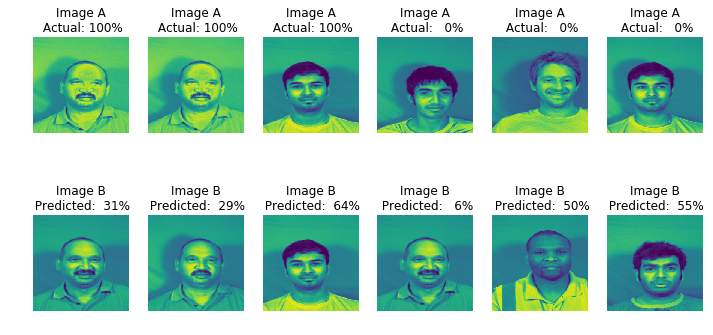

In [19]:
_ = show_model_output()


# use bigger batchsize

In [20]:
# we want a constant validation group to have a frame of reference for model performance
valid_a, valid_b, valid_sim = gen_random_batch(count_list, all_dir, 16)
loss_history = similarity_model.fit_generator(siam_gen(count_list, all_dir), 
                               steps_per_epoch = 100,#500,
                               validation_data=([valid_a, valid_b], valid_sim),
                                              epochs = 50,
                                             verbose = True,
                                             callbacks=[earlystopper,checkpointer])# make a generator out of the data
# def siam_gen(count_list, all_dir, batch_size = 5):
#     while True:
#         pv_a, pv_b, pv_sim = gen_random_batch(count_list, all_dir, batch_size//2)
#         yield [pv_a, pv_b], pv_sim
# # we want a constant validation group to have a frame of reference for model performance
# valid_a, valid_b, valid_sim = gen_random_batch(count_list, all_dir, 16)
# loss_history = similarity_model.fit_generator(siam_gen(count_list, all_dir), 
#                                steps_per_epoch = 100,
#                                validation_data=([valid_a, valid_b], valid_sim),
#                                               epochs = 50,
#                                              verbose = True)

32


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


16Epoch 1/50

16
16
16
16
  1/100 [..............................] - ETA: 4:56 - loss: 0.3332 - mean_absolute_error: 0.259116
16
16
16
  2/100 [..............................] - ETA: 4:26 - loss: 0.3647 - mean_absolute_error: 0.274816
16
16
  3/100 [..............................] - ETA: 4:15 - loss: 0.3273 - mean_absolute_error: 0.255416
16
 81/100 [=======================>......] - ETA: 40s - loss: 0.3514 - mean_absolute_error: 0.265316


100/100 [==============================] - 216s 2s/step - loss: 0.3531 - mean_absolute_error: 0.2654 - val_loss: 0.9130 - val_mean_absolute_error: 0.4040

Epoch 00001: val_loss did not improve from 0.52614
Epoch 2/50
16
 61/100 [=================>............] - ETA: 1:22 - loss: 0.2936 - mean_absolute_error: 0.224116


100/100 [==============================] - 215s 2s/step - loss: 0.2725 - mean_absolute_error: 0.2105 - val_loss: 0.4823 - val_mean_absolute_error: 0.3390

Epoch 00002: val_loss improved from 0.52614 to 0.48235, saving model to siamese_facenet_intensity.h5
Epoch 3/50
16
 41/100 [===========>..................] - ETA: 2:06 - loss: 0.2400 - mean_absolute_error: 0.184716


100/100 [==============================] - 214s 2s/step - loss: 0.2234 - mean_absolute_error: 0.1719 - val_loss: 0.5482 - val_mean_absolute_error: 0.3287

Epoch 00003: val_loss did not improve from 0.48235
Epoch 4/50
16
 22/100 [=====>........................] - ETA: 2:46 - loss: 0.2195 - mean_absolute_error: 0.160416


100/100 [==============================] - 215s 2s/step - loss: 0.1819 - mean_absolute_error: 0.1386 - val_loss: 0.7703 - val_mean_absolute_error: 0.3823

Epoch 00004: val_loss did not improve from 0.48235
Epoch 5/50
16
  3/100 [..............................] - ETA: 3:29 - loss: 0.2203 - mean_absolute_error: 0.155816


 85/100 [========================>.....] - ETA: 32s - loss: 0.1795 - mean_absolute_error: 0.130516


100/100 [==============================] - 216s 2s/step - loss: 0.1749 - mean_absolute_error: 0.1278 - val_loss: 0.2858 - val_mean_absolute_error: 0.1713

Epoch 00005: val_loss improved from 0.48235 to 0.28578, saving model to siamese_facenet_intensity.h5
Epoch 6/50
16
 65/100 [==================>...........] - ETA: 1:14 - loss: 0.1492 - mean_absolute_error: 0.109316


100/100 [==============================] - 215s 2s/step - loss: 0.1484 - mean_absolute_error: 0.1089 - val_loss: 0.1265 - val_mean_absolute_error: 0.1028

Epoch 00006: val_loss improved from 0.28578 to 0.12652, saving model to siamese_facenet_intensity.h5
Epoch 7/50
16
 45/100 [============>.................] - ETA: 1:57 - loss: 0.1334 - mean_absolute_error: 0.096416


100/100 [==============================] - 215s 2s/step - loss: 0.1352 - mean_absolute_error: 0.0933 - val_loss: 0.3212 - val_mean_absolute_error: 0.2024

Epoch 00007: val_loss did not improve from 0.12652
Epoch 8/50
16
 26/100 [======>.......................] - ETA: 2:39 - loss: 0.1170 - mean_absolute_error: 0.088016


100/100 [==============================] - 215s 2s/step - loss: 0.1193 - mean_absolute_error: 0.0872 - val_loss: 0.4216 - val_mean_absolute_error: 0.2163

Epoch 00008: val_loss did not improve from 0.12652
Epoch 9/50
16
  7/100 [=>............................] - ETA: 3:24 - loss: 0.1025 - mean_absolute_error: 0.082416


 89/100 [=========================>....] - ETA: 25s - loss: 0.1252 - mean_absolute_error: 0.084216


100/100 [==============================] - 238s 2s/step - loss: 0.1221 - mean_absolute_error: 0.0831 - val_loss: 0.3683 - val_mean_absolute_error: 0.1694

Epoch 00009: val_loss did not improve from 0.12652
Epoch 10/50
16
 69/100 [===================>..........] - ETA: 1:32 - loss: 0.1164 - mean_absolute_error: 0.079116


100/100 [==============================] - 300s 3s/step - loss: 0.1368 - mean_absolute_error: 0.0890 - val_loss: 0.2814 - val_mean_absolute_error: 0.1456

Epoch 00010: val_loss did not improve from 0.12652
Epoch 11/50
16
 49/100 [=============>................] - ETA: 2:24 - loss: 0.0978 - mean_absolute_error: 0.070116


100/100 [==============================] - 261s 3s/step - loss: 0.0843 - mean_absolute_error: 0.0612 - val_loss: 0.1343 - val_mean_absolute_error: 0.0923

Epoch 00011: val_loss did not improve from 0.12652
Epoch 00011: early stopping


6


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


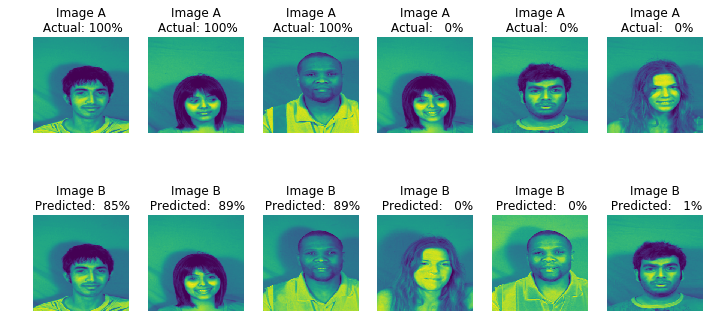

In [21]:
_ = show_model_output()